Reinforcement Learning in Python

In [9]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531 
# Write a program to implement reinforcement learning in python.

In [10]:
# Reinforcement Learning is a feedback-based Machine learning technique in which an agent learns to behave in an environment by performing the actions and seeing the results of actions. For each good action, the agent gets positive feedback, and for each bad action, the agent gets negative feedback or penalty.

Implementing Wumpus World to show Reinforcement Learning in Python

In [11]:
# The Wumpus world is a cave which has 4/4 rooms connected with passageways. So there are total 16 rooms which are connected with each other. We have a knowledge-based agent who will go forward in this world. The cave has a room with a beast which is called Wumpus, who eats anyone who enters the room. The Wumpus can be shot by the agent, but the agent has a single arrow. In the Wumpus world, there are some Pits rooms which are bottomless, and if agent falls in Pits, then he will be stuck there forever. The exciting thing with this cave is that in one room there is a possibility of finding a heap of gold. So the agent goal is to find the gold and climb out the cave without fallen into Pits or eaten by Wumpus. The agent will get a reward if he comes out with gold, and he will get a penalty if eaten by Wumpus or falls in the pit.

Wumpus World Image

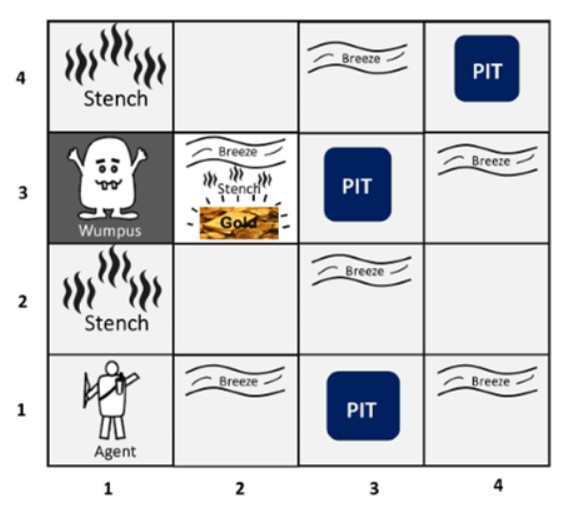

In [12]:
# Importing the libraries.
from IPython.display import Image

Image(filename='Wumpus_World.jpg') 

Wumpus World Code

In [13]:
# Wumpus world Problem
# P -> PIT
# B -> BREEZEZ
# W -> WUMPUS(monster)
# A -> AGENT
# S -> STENCH
# G -> GOLD

# Rules:
# Location of agent is fixed to the corners.
# Breeze should be adjacent to the Pits.
# Rest all the things are random.

# 4X4 Grid Formation:

import numpy as np
import random

In [14]:
def create_grid():
    global grid
    grid = np.zeros((4,4),dtype=str)
    grid[3][0]='A'
    row_gold = random.randint(0,3)
    column_gold = random.randint(0,3)
    grid[row_gold][column_gold]='G'
    row_wumpus = random.randint(0,3)
    column_wumpus = random.randint(0,3)
    if(grid[row_wumpus][column_wumpus]==""):
        grid[row_wumpus][column_wumpus]='W'

    if (row_wumpus != 0 and grid[row_wumpus - 1][column_wumpus] == ""):
        grid[row_wumpus - 1][column_wumpus] = 'S'
    if (row_wumpus != 3 and grid[row_wumpus + 1][column_wumpus] == ""):
        grid[row_wumpus + 1][column_wumpus] = 'S'
    if (column_wumpus != 0 and grid[row_wumpus][column_wumpus - 1] == ""):
        grid[row_wumpus][column_wumpus - 1] = 'S'
    if (column_wumpus != 3 and grid[row_wumpus][column_wumpus + 1] == ""):
        grid[row_wumpus][column_wumpus + 1] = 'S'

    pit=0
    while(pit<2):
        row_pit = random.randint(0,3)
        column_pit = random.randint(0,3)
        if(grid[row_pit][column_pit]==""):
            grid[row_pit][column_pit]='P'
            if (row_pit != 0 and grid[row_pit - 1][column_pit] == ""):
                grid[row_pit - 1][column_pit] = "B"
            if (row_pit != 3 and grid[row_pit + 1][column_pit] == ""):
                grid[row_pit + 1][column_pit] = "B"
            if (column_pit != 0 and grid[row_pit][column_pit - 1] == ""):
                grid[row_pit][column_pit - 1] = "B"
            if (column_pit != 3 and grid[row_pit][column_pit + 1] == ""):
                grid[row_pit][column_pit + 1] = "B"
            pit+=1

In [15]:
def play():
    global score
    score=100
    global row_actor
    global column_actor
    row_actor=3
    column_actor=0
    while(True):
        print(grid)
        print(f'Current Score : {score}')
        score = score-1
        direction = input("Enter W A D : \t")
        if(direction=="W" or direction=="w"):
            if(row_actor==0):
                print("Invalid direction")
            else:
                if (grid[row_actor - 1][column_actor] == "W" or grid[row_actor - 1][column_actor] == "P"):
                    score = score - 1000
                    print(f'You Lose , Your Score : {score}')
                    break
                elif (grid[row_actor - 1][column_actor] == "G"):
                    score = score + 1000
                    print(f'You Won , Your Score : {score}')
                    break
                elif (grid[row_actor - 1][column_actor] == "S" or grid[row_actor - 1][column_actor] == "B"):
                    score=score-100
                    grid[row_actor][column_actor] = ""
                    row_actor = row_actor - 1
                    grid[row_actor][column_actor] = "A"
                    print("Beware you are close to Wumpus or a Pit")
                elif (grid[row_actor - 1][column_actor] == ""):
                    grid[row_actor][column_actor] = ""
                    row_actor = row_actor - 1
                    grid[row_actor][column_actor] = "A"

        elif(direction=="A" or direction=="a"):
            if(column_actor==0):
                print("Invalid Direction")
            else:
                if (grid[row_actor][column_actor - 1] == "W" or grid[row_actor][column_actor - 1] == "P"):
                    score = score - 1000
                    print(f"You Lose , Your Score : {score}")
                    break
                elif (grid[row_actor][column_actor - 1] == "G"):
                    score = score + 1000
                    print(f'You Won , Your Score : {score}')
                    break
                elif (grid[row_actor][column_actor - 1] == "S" or grid[row_actor][column_actor - 1] == "B"):
                    score=score-100
                    grid[row_actor][column_actor] = ""
                    column_actor = column_actor - 1
                    grid[row_actor][column_actor] = "A"
                    print("Beware you are close to Wumpus or a pit")
                elif (grid[row_actor][column_actor - 1] == ""):
                    grid[row_actor][column_actor] = ""
                    column_actor = column_actor - 1
                    grid[row_actor][column_actor] = "A"

        elif(direction=="D" or direction=="d"):
            if(column_actor==3):
                print("Invalid Direction")
            else:
                if (grid[row_actor][column_actor + 1] == "W" or grid[row_actor][column_actor + 1] == "P"):
                    score = score - 1000
                    print(f'You Lose , Your Score : {score}')
                    break
                elif (grid[row_actor][column_actor + 1] == "G"):
                    score = score + 1000
                    print(f'You Won , Your Score : {score}')
                    break
                elif (grid[row_actor][column_actor + 1] == "S" or grid[row_actor][column_actor + 1] == "B"):
                    score=score-100
                    grid[row_actor][column_actor] = ""
                    column_actor = column_actor + 1
                    grid[row_actor][column_actor] = "A"
                    print("Beware you are close to Wumpus or a pit")
                elif (grid[row_actor][column_actor + 1] == ""):
                    grid[row_actor][column_actor] = ""
                    column_actor = column_actor + 1
                    grid[row_actor][column_actor] = "A"

In [16]:
def main():
    print("Welcome To This Wumpus World Game")
    print("Instructions :")
    print("Your Initial Score is 100")
    print("If you entered in a room where wumpus is present then you will loose 1000 points and the game will end")
    print("If you entered in a room where pit is present then you will loose 1000 points and the game will end")
    print("if you entered in a room where gold is present then you will gain 1000 points and you won the game")
    print("if you entered in a room where breeze or sting is present then you will loose 100 points")
    print("For every moment you will loose 1 point so move your actor effectively")
    print("W --> Moves upwards")
    print("A --> Moves towards left")
    print("D --> Moves towards right")
    create_grid()
    play()
    print("Do you want to replay? Enter y for yes and n for no :")
    replay = input()
    if(replay=="y"):
        main()

main()

Welcome To This Wumpus World Game
Instructions :
Your Initial Score is 100
If you entered in a room where wumpus is present then you will loose 1000 points and the game will end
If you entered in a room where pit is present then you will loose 1000 points and the game will end
if you entered in a room where gold is present then you will gain 1000 points and you won the game
if you entered in a room where breeze or sting is present then you will loose 100 points
For every moment you will loose 1 point so move your actor effectively
W --> Moves upwards
A --> Moves towards left
D --> Moves towards right
[['B' 'P' 'B' 'P']
 ['' 'B' 'G' 'B']
 ['' '' '' 'S']
 ['A' '' 'S' 'W']]
Current Score : 100
[['B' 'P' 'B' 'P']
 ['' 'B' 'G' 'B']
 ['A' '' '' 'S']
 ['' '' 'S' 'W']]
Current Score : 99
[['B' 'P' 'B' 'P']
 ['A' 'B' 'G' 'B']
 ['' '' '' 'S']
 ['' '' 'S' 'W']]
Current Score : 98
Invalid Direction
[['B' 'P' 'B' 'P']
 ['A' 'B' 'G' 'B']
 ['' '' '' 'S']
 ['' '' 'S' 'W']]
Current Score : 97
Beware yo